# Suffix Trie

## TODO: すべてのノードにindexをアペンドしたせいで遅い、あるノードから下に紐づくすべてのindexを取得するget_index()の実装を行う（下画像参照）

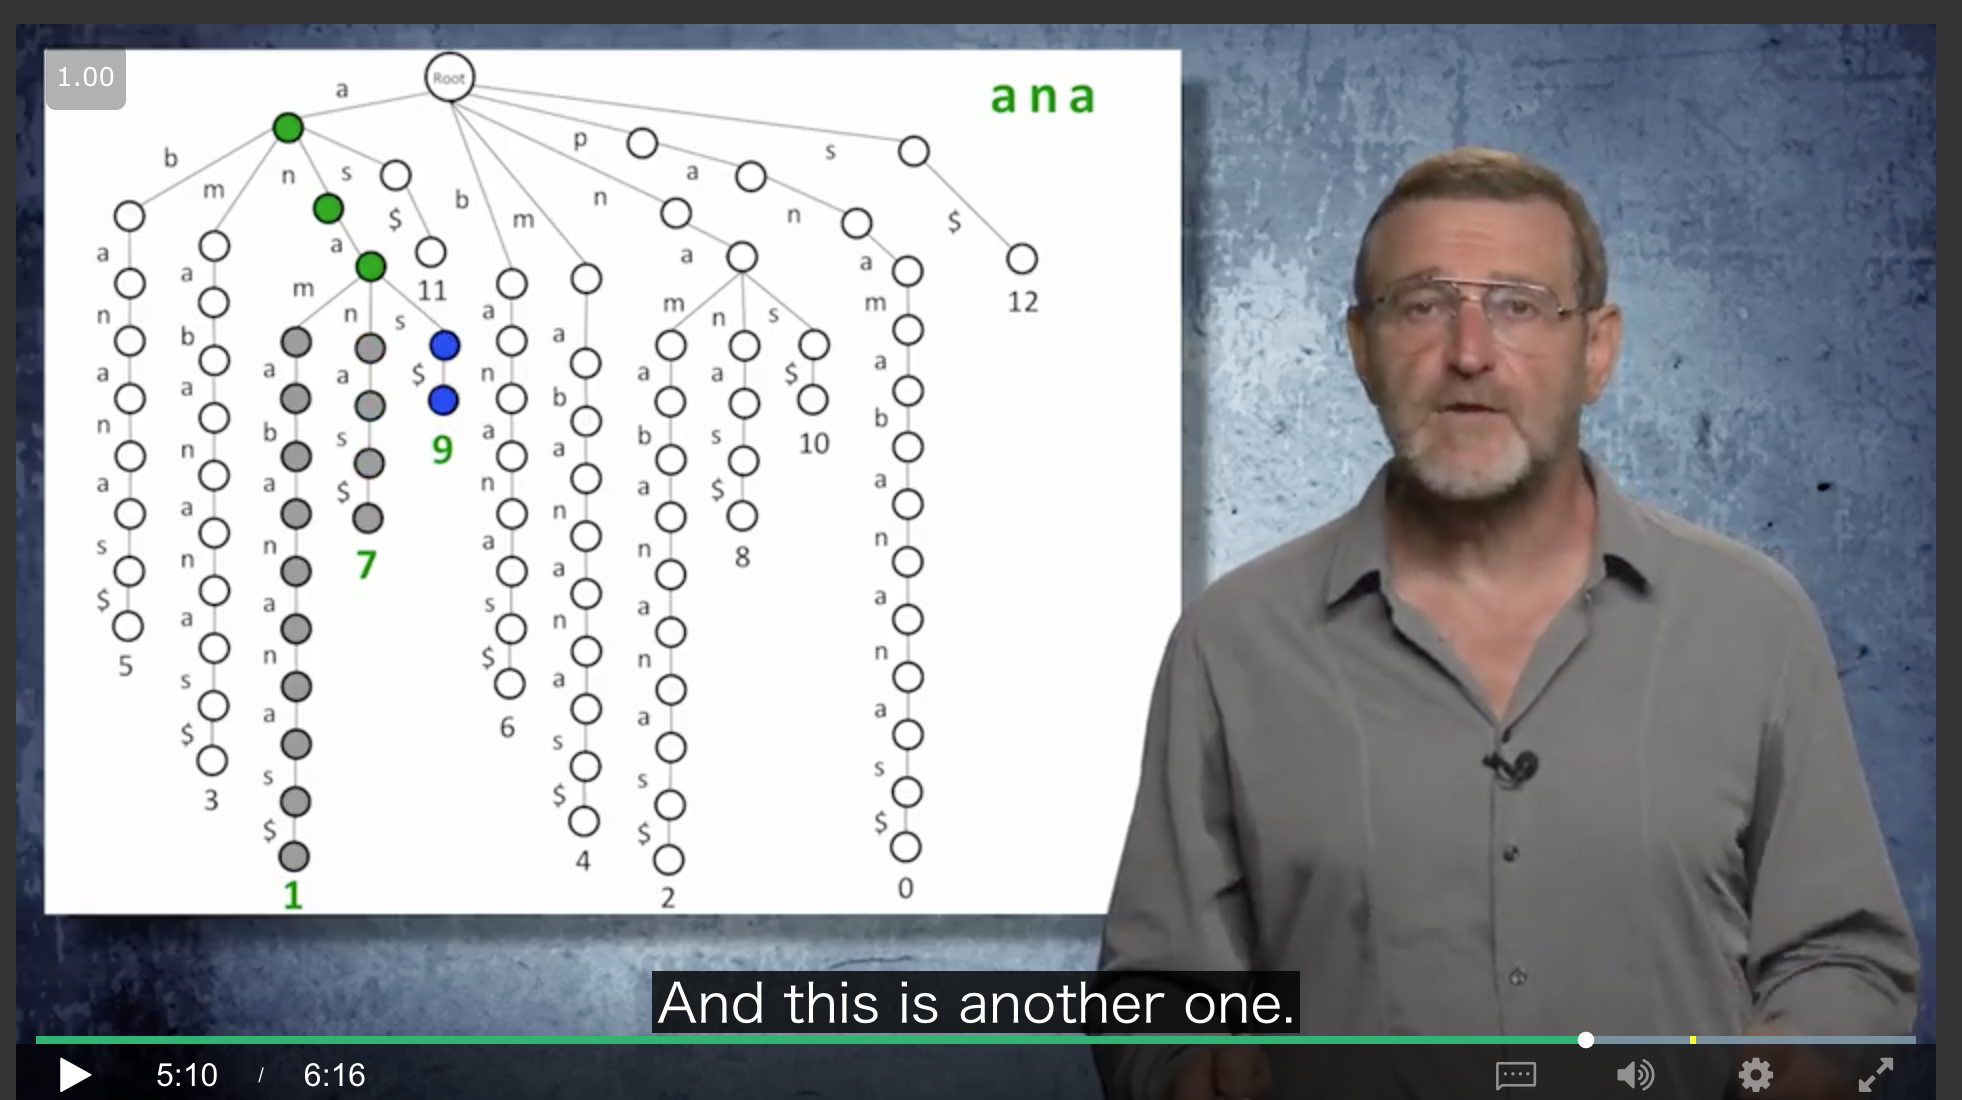

Suffix(接尾辞):   
文字の後ろにくっつくもの、例えば比較級の「-er」など  
文字列「cocoa」のsuffixは「cocoa」、「ocoa」、「coa」、「oa」、「a」

Suffix Trie:  
テキストのsuffixによるtrie構造を作り、パターンが合致するかを見ていく  
「every substring of s is a prefix of some suffix of s.」
- メモリ: 
- 計算量: O()
- メリット: 
- デメリット: 

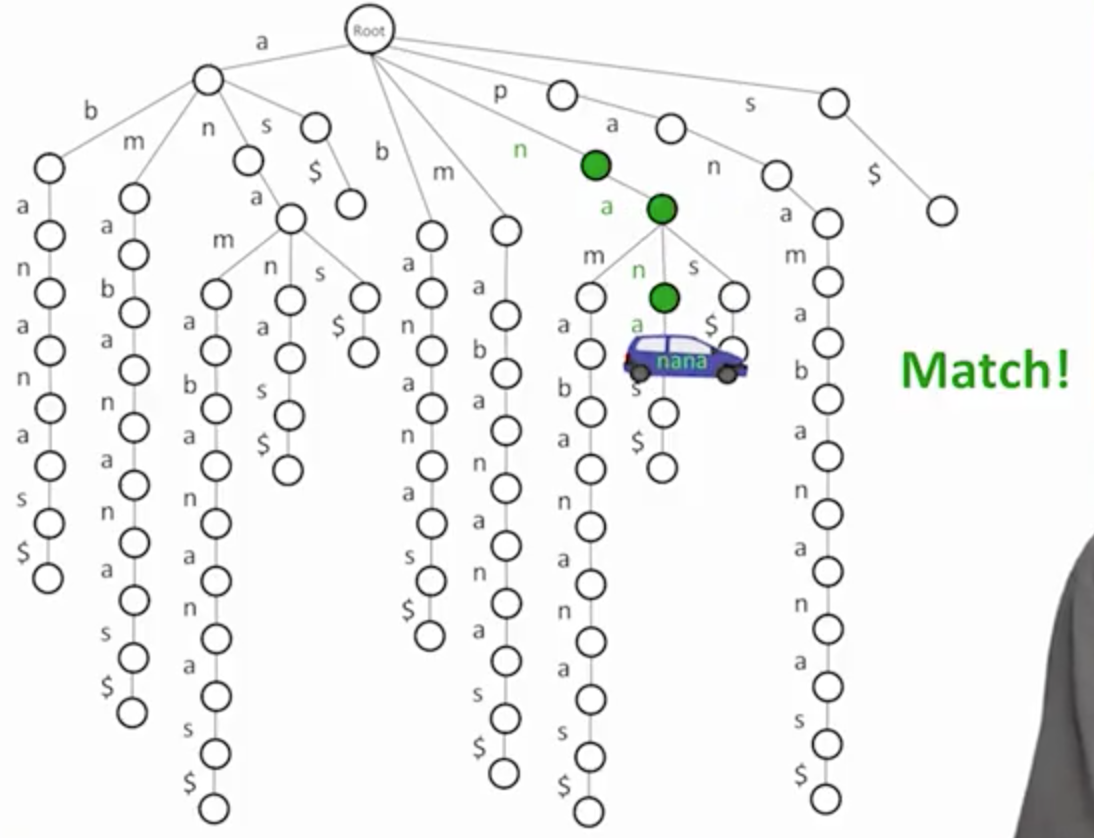
引用: https://www.coursera.org/learn/algorithms-on-strings/lecture/V1AYj/herding-text-into-suffix-trie

In [1]:
class Node:
    """
    トライを構成する一つ一つのノード
    """
    def __init__(self, parent=None, index=None):
        self.parent = parent
        self.index = []
        self.children = {}
    
    def get_children_index(self):
        """
        自分のノードの下に紐づくインデックスを全て返す
        TODO: やり方わからん
        """
        results = []
        node = self
        while node.children:
            index = [v.index for v in self.children.values() if v.index]
            results.append(index)
        

In [2]:
class Trie:
    """
    トライ構造
    addだけ実装
    """
    def __init__(self):
        self.root = Node()
        
    def add(self, pattern, i):
        node = self.root
        for p in pattern:
            if p not in node.children:
                child = Node(node)
                node.children[p] = child
            node = node.children[p]
            # TODO: appendをここにいれたから時間がかかる
            node.index.append(i)
    
    def get_index(self):
        """
        すべての子要素のインデックスを取得する
        """


In [3]:
def get_suffix(text: str):
    return [text[i:] for i, s in enumerate(text)]

In [9]:
def suffix_trie_matching(text, patterns):
    results = {p:[] for p in patterns}
    suffixes = [text[i:] for i, s in enumerate(text)]
    trie = Trie()
    root = trie.root
    
    # suffixからトライ構造を構築
    print('create trie')
    for i, suffix in enumerate(suffixes):
        print(i, '/', len(suffixes))
        trie.add(suffix, i)
    print('created trie')
        
#     return trie
    
    # トライに対してパターンをマッチング
    # 一つ一つのパターンがtrie_matching()の時のtextに相当
    # findのようにインデックスを返す
    print('search')
    for pattern in patterns:
        print('pattern')
        node = root
        try:
            for p in pattern:
                    node = node.children[p]
            results[pattern] = node.index
        except:
            continue

#         for i, _ in enumerate(pattern):
#             j = i
#             node = root
#             print('start', pattern)
#             try:
#                 while pattern[j] in node.children:
#                     print(pattern[j])
#                     node = node.children[pattern[j]]
#                     j += 1
#                     if j == len(pattern):
#                         results[pattern] = node.index
#             except:
#                 break
    
    return results

## cocoaでテスト

In [10]:
text = 'cocoa'
patterns = [
    'coa',
    'a',
    'oc',
    'coge'
]
suffix_trie_matching(text, patterns)

create trie
0 / 5
1 / 5
2 / 5
3 / 5
4 / 5
created trie
search
pattern
pattern
pattern
pattern


{'a': [4], 'coa': [2], 'coge': [], 'oc': [1]}

## panamabananaでテスト

In [11]:
text = 'panamabanana'
patterns = [
    'banana',
    'pan',
    'and',
    'nab',
    'antenna',
    'bandana',
    'ananas',
    'nana',
    'na'
]
suffix_trie_matching(text, patterns)

create trie
0 / 12
1 / 12
2 / 12
3 / 12
4 / 12
5 / 12
6 / 12
7 / 12
8 / 12
9 / 12
10 / 12
11 / 12
created trie
search
pattern
pattern
pattern
pattern
pattern
pattern
pattern
pattern
pattern


{'ananas': [],
 'and': [],
 'antenna': [],
 'banana': [6],
 'bandana': [],
 'na': [2, 8, 10],
 'nab': [],
 'nana': [8],
 'pan': [0]}

## brownコーパスでテスト

In [12]:
with open('./sample.txt', 'r') as f:
    text = f.read()
patterns = [
    'do',
    'what',
    'make'
]

In [ ]:
%time suffix_trie_matching(text, patterns)

create trie
0 / 12495
1 / 12495
2 / 12495
3 / 12495
4 / 12495
5 / 12495
6 / 12495
7 / 12495
8 / 12495
9 / 12495
10 / 12495
11 / 12495
12 / 12495
13 / 12495
14 / 12495
15 / 12495
16 / 12495
17 / 12495
18 / 12495
19 / 12495
20 / 12495
21 / 12495
22 / 12495
23 / 12495
24 / 12495
25 / 12495
26 / 12495
27 / 12495
28 / 12495
29 / 12495
30 / 12495
31 / 12495
32 / 12495
33 / 12495
34 / 12495
35 / 12495
36 / 12495
37 / 12495
38 / 12495
39 / 12495
40 / 12495
41 / 12495
42 / 12495
43 / 12495
44 / 12495
45 / 12495
46 / 12495
47 / 12495
48 / 12495
49 / 12495
50 / 12495
51 / 12495
52 / 12495
53 / 12495
54 / 12495
55 / 12495
56 / 12495
57 / 12495
58 / 12495
59 / 12495
60 / 12495
61 / 12495
62 / 12495
63 / 12495
64 / 12495
65 / 12495
66 / 12495
67 / 12495
68 / 12495
69 / 12495
70 / 12495
71 / 12495
72 / 12495
73 / 12495
74 / 12495
75 / 12495
76 / 12495
77 / 12495
78 / 12495
79 / 12495
80 / 12495
81 / 12495
82 / 12495
83 / 12495
84 / 12495
85 / 12495
86 / 12495
87 / 12495
88 / 12495
89 / 12495
90 / 124

701 / 12495
702 / 12495
703 / 12495
704 / 12495
705 / 12495
706 / 12495
707 / 12495
708 / 12495
709 / 12495
710 / 12495
711 / 12495
712 / 12495
713 / 12495
714 / 12495
715 / 12495
716 / 12495
717 / 12495
718 / 12495
719 / 12495
720 / 12495
721 / 12495
722 / 12495
723 / 12495
724 / 12495
725 / 12495
726 / 12495
727 / 12495
728 / 12495
729 / 12495
730 / 12495
731 / 12495
732 / 12495
733 / 12495
734 / 12495
735 / 12495
736 / 12495
737 / 12495
738 / 12495
739 / 12495
740 / 12495
741 / 12495
742 / 12495
743 / 12495
744 / 12495
745 / 12495
746 / 12495
747 / 12495
748 / 12495
749 / 12495
750 / 12495
751 / 12495
752 / 12495
753 / 12495
754 / 12495
755 / 12495
756 / 12495
757 / 12495
758 / 12495
759 / 12495
760 / 12495
761 / 12495
762 / 12495
763 / 12495
764 / 12495
765 / 12495
766 / 12495
767 / 12495
768 / 12495
769 / 12495
770 / 12495
771 / 12495
772 / 12495
773 / 12495
774 / 12495
775 / 12495
776 / 12495
777 / 12495
778 / 12495
779 / 12495
780 / 12495
781 / 12495
782 / 12495
783 / 12495
784 

1366 / 12495
1367 / 12495
1368 / 12495
1369 / 12495
1370 / 12495
1371 / 12495
1372 / 12495
1373 / 12495
1374 / 12495
1375 / 12495
1376 / 12495
1377 / 12495
1378 / 12495
1379 / 12495
1380 / 12495
1381 / 12495
1382 / 12495
1383 / 12495
1384 / 12495
1385 / 12495
1386 / 12495
1387 / 12495
1388 / 12495
1389 / 12495
1390 / 12495
1391 / 12495
1392 / 12495
1393 / 12495
1394 / 12495
1395 / 12495
1396 / 12495
1397 / 12495
1398 / 12495
1399 / 12495
1400 / 12495
1401 / 12495
1402 / 12495
1403 / 12495
1404 / 12495
1405 / 12495
1406 / 12495
1407 / 12495
1408 / 12495
1409 / 12495
1410 / 12495
1411 / 12495
1412 / 12495
1413 / 12495
1414 / 12495
1415 / 12495
1416 / 12495
1417 / 12495
1418 / 12495
1419 / 12495
1420 / 12495
1421 / 12495
1422 / 12495
1423 / 12495
1424 / 12495
1425 / 12495
1426 / 12495
1427 / 12495
1428 / 12495
1429 / 12495
1430 / 12495
1431 / 12495
1432 / 12495
1433 / 12495
1434 / 12495
1435 / 12495
1436 / 12495
1437 / 12495
1438 / 12495
1439 / 12495
1440 / 12495
1441 / 12495
1442 / 12495

2001 / 12495
2002 / 12495
2003 / 12495
2004 / 12495
2005 / 12495
2006 / 12495
2007 / 12495
2008 / 12495
2009 / 12495
2010 / 12495
2011 / 12495
2012 / 12495
2013 / 12495
2014 / 12495
2015 / 12495
2016 / 12495
2017 / 12495
2018 / 12495
2019 / 12495
2020 / 12495
2021 / 12495
2022 / 12495
2023 / 12495
2024 / 12495
2025 / 12495
2026 / 12495
2027 / 12495
2028 / 12495
2029 / 12495
2030 / 12495
2031 / 12495
2032 / 12495
2033 / 12495
2034 / 12495
2035 / 12495
2036 / 12495
2037 / 12495
2038 / 12495
2039 / 12495
2040 / 12495
2041 / 12495
2042 / 12495
2043 / 12495
2044 / 12495
2045 / 12495
2046 / 12495
2047 / 12495
2048 / 12495
2049 / 12495
2050 / 12495
2051 / 12495
2052 / 12495
2053 / 12495
2054 / 12495
2055 / 12495
2056 / 12495
2057 / 12495
2058 / 12495
2059 / 12495
2060 / 12495
2061 / 12495
2062 / 12495
2063 / 12495
2064 / 12495
2065 / 12495
2066 / 12495
2067 / 12495
2068 / 12495
2069 / 12495
2070 / 12495
2071 / 12495
2072 / 12495
2073 / 12495
2074 / 12495
2075 / 12495
2076 / 12495
2077 / 12495

2634 / 12495
2635 / 12495
2636 / 12495
2637 / 12495
2638 / 12495
2639 / 12495
2640 / 12495
2641 / 12495
2642 / 12495
2643 / 12495
2644 / 12495
2645 / 12495
2646 / 12495
2647 / 12495
2648 / 12495
2649 / 12495
2650 / 12495
2651 / 12495
2652 / 12495
2653 / 12495
2654 / 12495
2655 / 12495
2656 / 12495
2657 / 12495
2658 / 12495
2659 / 12495
2660 / 12495
2661 / 12495
2662 / 12495
2663 / 12495
2664 / 12495
2665 / 12495
2666 / 12495
2667 / 12495
2668 / 12495
2669 / 12495
2670 / 12495
2671 / 12495
2672 / 12495
2673 / 12495
2674 / 12495
2675 / 12495
2676 / 12495
2677 / 12495
2678 / 12495
2679 / 12495
2680 / 12495
2681 / 12495
2682 / 12495
2683 / 12495
2684 / 12495
2685 / 12495
2686 / 12495
2687 / 12495
2688 / 12495
2689 / 12495
2690 / 12495
2691 / 12495
2692 / 12495
2693 / 12495
2694 / 12495
2695 / 12495
2696 / 12495
2697 / 12495
2698 / 12495
2699 / 12495
2700 / 12495
2701 / 12495
2702 / 12495
2703 / 12495
2704 / 12495
2705 / 12495
2706 / 12495
2707 / 12495
2708 / 12495
2709 / 12495
2710 / 12495

3274 / 12495
3275 / 12495
3276 / 12495
3277 / 12495
3278 / 12495
3279 / 12495
3280 / 12495
3281 / 12495
3282 / 12495
3283 / 12495
3284 / 12495
3285 / 12495
3286 / 12495
3287 / 12495
3288 / 12495
3289 / 12495
3290 / 12495
3291 / 12495
3292 / 12495
3293 / 12495
3294 / 12495
3295 / 12495
3296 / 12495
3297 / 12495
3298 / 12495
3299 / 12495
3300 / 12495
3301 / 12495
3302 / 12495
3303 / 12495
3304 / 12495
3305 / 12495
3306 / 12495
3307 / 12495
3308 / 12495
3309 / 12495
3310 / 12495
3311 / 12495
3312 / 12495
3313 / 12495
3314 / 12495
3315 / 12495
3316 / 12495
3317 / 12495
3318 / 12495
3319 / 12495
3320 / 12495
3321 / 12495
3322 / 12495
3323 / 12495
3324 / 12495
3325 / 12495
3326 / 12495
3327 / 12495
3328 / 12495
3329 / 12495
3330 / 12495
3331 / 12495
3332 / 12495
3333 / 12495
3334 / 12495
3335 / 12495
3336 / 12495
3337 / 12495
3338 / 12495
3339 / 12495
3340 / 12495
3341 / 12495
3342 / 12495
3343 / 12495
3344 / 12495
3345 / 12495
3346 / 12495
3347 / 12495
3348 / 12495
3349 / 12495
3350 / 12495

3915 / 12495
3916 / 12495
3917 / 12495
3918 / 12495
3919 / 12495
3920 / 12495
3921 / 12495
3922 / 12495
3923 / 12495
3924 / 12495
3925 / 12495
3926 / 12495
3927 / 12495
3928 / 12495
3929 / 12495
3930 / 12495
3931 / 12495
3932 / 12495
3933 / 12495
3934 / 12495
3935 / 12495
3936 / 12495
3937 / 12495
3938 / 12495
3939 / 12495
3940 / 12495
3941 / 12495
3942 / 12495
3943 / 12495
3944 / 12495
3945 / 12495
3946 / 12495
3947 / 12495
3948 / 12495
3949 / 12495
3950 / 12495
3951 / 12495
3952 / 12495
3953 / 12495
3954 / 12495
3955 / 12495
3956 / 12495
3957 / 12495
3958 / 12495
3959 / 12495
3960 / 12495
3961 / 12495
3962 / 12495
3963 / 12495
3964 / 12495
3965 / 12495
3966 / 12495
3967 / 12495
3968 / 12495
3969 / 12495
3970 / 12495
3971 / 12495
3972 / 12495
3973 / 12495
3974 / 12495
3975 / 12495
3976 / 12495
3977 / 12495
3978 / 12495
3979 / 12495
3980 / 12495
3981 / 12495
3982 / 12495
3983 / 12495
3984 / 12495
3985 / 12495
3986 / 12495
3987 / 12495
3988 / 12495
3989 / 12495
3990 / 12495
3991 / 12495

参考
- https://www.coursera.org/learn/algorithms-on-strings/lecture/V1AYj/herding-text-into-suffix-trie
- https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/suffixtrees.pdf
